# <p style="text-align: center;">EE 379K: Data Science Laboratory</p>
# <p style="text-align: center;">Kaggle Midterm</p>
## <p style="text-align: center;">Lab Section: Wednesday 4:30-7:30pm</p>
## <p style="text-align: center;">Koger Darden (mkd788)</p>
## <p style="text-align: center;">https://www.kaggle.com/c/utdslabsp18</p>

***Further Ideas:***  
- sqrt(), log(), exp(), square, and cube data to see if anything interesting is found.
- Ensembling
- XGBoost
- Bootstrap, random forests
- MLP neural networks  
"With tabular data, it often means a mixture of aggregating or combining features to create new features, and decomposing or splitting features to create new features."

In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import time

In [2]:
train = pd.read_csv('data/train_final.csv', index_col='id')
test = pd.read_csv('data/test_final.csv', index_col='id')
sample_sub = pd.read_csv('data/sample_submission.csv', index_col='id')

print(train.shape)
display(train.head())
print(test.shape)
display(test.head())
print(sample_sub.shape)
display(sample_sub.head())

print("--- Training data summaries ---")
print(train.describe())
print("--- Test data summaries ---")
print(test.describe())

(16383, 28)


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,,,,,,,,,
1,1,38733,61385,0,38,118751,1000,32020,1,121980,...,1,118830,1,1,126461,1,46871,NaN,NaN,NaN
2,1,34248,51329,0,41,120800,1000,130630,1,124029,...,1,118832,1,1,130296,1,42386,NaN,NaN,NaN
3,1,15830,5522,0,50,118779,1000,303218,2,122006,...,1,118832,1,2,127063,1,23968,NaN,NaN,NaN
4,1,19417,6754,0,45,123163,2000,19024,1,126391,...,1,118832,1,1,15274,1,27555,NaN,NaN,NaN
5,1,42122,16991,0,41,119193,1000,303218,1,122422,...,1,118832,1,1,133491,1,50260,NaN,NaN,NaN


(16385, 24)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
id,,,,,,,,,,,,,,,,,,,,,
16384,27991,135396,0,33,120578,17000,143022,1,124156,140341,...,1,128168,121276,1,122084,1,1,127696,1,36129
16385,82444,54655,0,38,120064,18000,315517,1,123643,138050,...,1,121648,120763,1,119703,1,2,127441,1,90582
16386,37950,23477,1,27,120267,1000,142929,1,123845,137960,...,1,314350,120965,1,119703,1,1,127029,1,46088
16387,75000,92055,0,33,118844,2000,130186,1,183832,128090,...,1,140144,180952,1,118961,1,1,127973,1,83138
16388,84243,8156,0,40,136613,2000,132071,1,139841,128051,...,1,121642,136961,1,118832,1,1,126927,1,92381


(16385, 1)


,Y
id,
16384,1.0
16385,0.0
16386,1.0
16387,0.5
16388,0.5


--- Training data summaries ---
                  Y             F1             F2            F3            F4  \
count  16383.000000   16383.000000   16383.000000  16383.000000  16383.000000   
mean       0.941464   44312.117256   26032.070927      0.048953     40.002991   
std        0.234762   34815.325971   35742.773305      0.281347      4.998992   
min        0.000000     999.000000      43.000000      0.000000     21.000000   
25%        1.000000   21896.000000    4603.000000      0.000000     37.000000   
50%        1.000000   36806.000000   13819.000000      0.000000     40.000000   
75%        1.000000   75414.000000   41799.500000      0.000000     43.000000   
max        1.000000  314150.000000  311733.000000      7.000000     59.000000   

                  F5            F6             F7            F8  \
count   16383.000000  1.638300e+04   16383.000000  16383.000000   
mean   121039.419459  6.272233e+03  201731.398767      1.043216   
std      5802.987367  1.124685e+05  1

In [3]:
# Remove null columns
train = train.dropna(axis=1, how='all')

In [4]:
#print(train['F3'].value_counts())
#print(train['F8'].value_counts())

display(train)

,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
id,,,,,,,,,,,,,,,,,,,,,
1,1,38733,61385,0,38,118751,1000,32020,1,121980,...,1,119757,119100,1,118830,1,1,126461,1,46871
2,1,34248,51329,0,41,120800,1000,130630,1,124029,...,1,138110,121149,1,118832,1,1,130296,1,42386
3,1,15830,5522,0,50,118779,1000,303218,2,122006,...,1,119777,119126,1,118832,1,2,127063,1,23968
4,1,19417,6754,0,45,123163,2000,19024,1,126391,...,2,270637,123511,1,118832,1,1,15274,1,27555
5,1,42122,16991,0,41,119193,1000,303218,1,122422,...,1,119777,119542,1,118832,1,1,133491,1,50260
6,1,80917,20986,0,43,120061,2000,142803,1,123640,...,1,184371,120760,1,120057,1,1,132276,1,89055
7,1,15851,53356,0,40,120822,1000,303218,1,124050,...,1,131956,121170,1,118832,1,1,130764,1,23989
8,1,42296,4656,0,44,118779,1000,303218,1,122006,...,1,119777,119126,1,118832,1,1,128536,1,50434
9,1,78876,42267,0,48,120064,2000,315517,1,123643,...,1,121648,120763,1,119703,2,1,127364,1,87014


## Data visualization

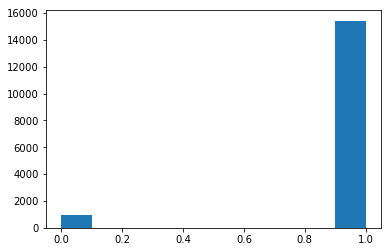

In [5]:
# Examine distribution of labels
plt.hist(train['Y'])
plt.show()

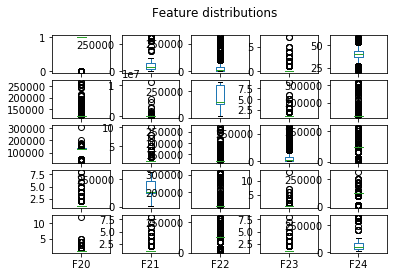

In [6]:
# Box whisker plots of data
train.plot(kind='box', subplots=True, title="Feature distributions", layout=(5,5), sharex=False, sharey=False)
plt.show()

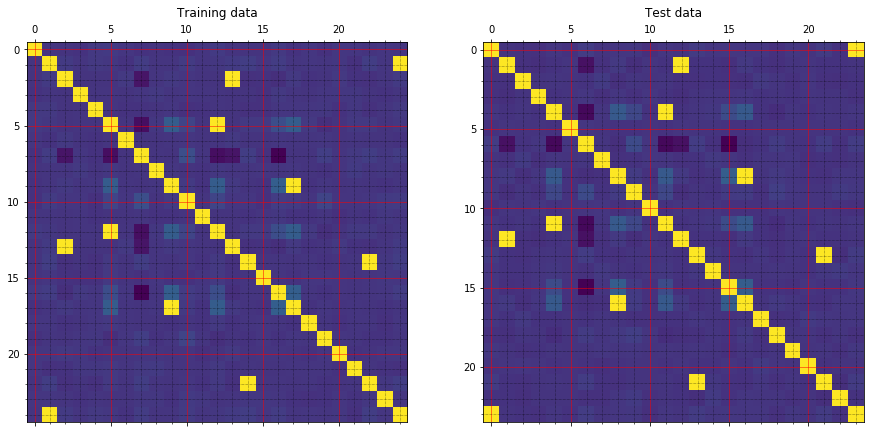

In [7]:
# Plot correlation matrices
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.matshow(train.corr())
ax2.matshow(test.corr())

# Customize the grid
ax1.set_title('Training data')
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax2.set_title('Test data')
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

It looks like highly correlated variables are as follows: **(F1, F24), (F2, F13), (F5, F12), (F9, F17), (F14, F22)**  
We can delete **F24, F13, F12, F17, F22** So that they don't double effect the variance of data during PCA.


In [8]:
# Drop highly correlated redundant data
drop_cols = ['F24', 'F13', 'F12', 'F17', 'F22']
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

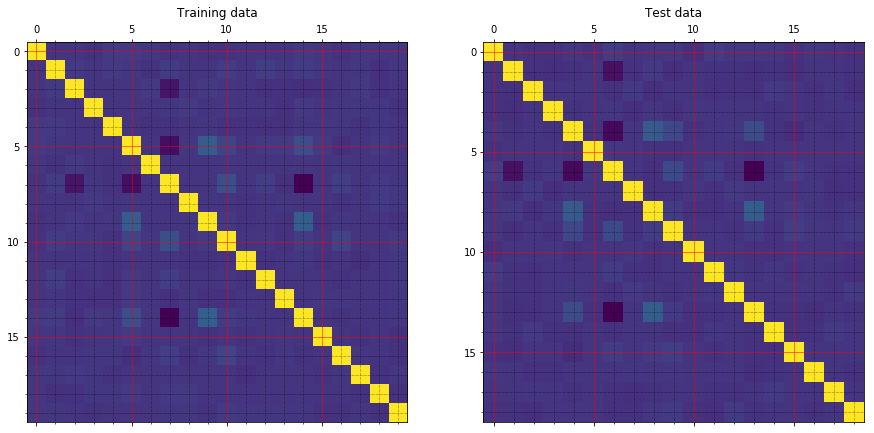

In [9]:
# Plot correlation matrices
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.matshow(train.corr())
ax2.matshow(test.corr())

# Customize the grid
ax1.set_title('Training data')
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax2.set_title('Test data')
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

Much better.

In [10]:
abs(train.corr())

,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F14,F15,F16,F18,F19,F20,F21,F23
Y,1.000000,0.002246,0.001937,0.010216,0.014869,0.017641,0.006404,0.007767,0.004754,0.009172,0.014260,0.001229,0.005234,0.003820,0.014716,0.003873,0.012057,0.007981,0.004361,0.006969
F1,0.002246,1.000000,0.021099,0.001617,0.013458,0.009805,0.008771,0.030148,0.000271,0.001245,0.025177,0.000427,0.034025,0.003662,0.026863,0.003125,0.001193,0.009140,0.014095,0.003462
F2,0.001937,0.021099,1.000000,0.006220,0.002752,0.005207,0.015781,0.115176,0.002760,0.016569,0.004374,0.005914,0.013676,0.009738,0.022680,0.007837,0.003380,0.015126,0.008684,0.000675
F3,0.010216,0.001617,0.006220,1.000000,0.002240,0.001065,0.004685,0.005093,0.015097,0.001942,0.006098,0.000698,0.003613,0.012439,0.016249,0.005965,0.004481,0.007932,0.009936,0.007878
F4,0.014869,0.013458,0.002752,0.002240,1.000000,0.001278,0.010186,0.009524,0.004465,0.003596,0.014981,0.007960,0.011152,0.013689,0.006462,0.005253,0.010903,0.007670,0.008547,0.001041
F5,0.017641,0.009805,0.005207,0.001065,0.001278,1.000000,0.001294,0.136707,0.007538,0.163755,0.058626,0.004131,0.016191,0.015735,0.097540,0.012567,0.022459,0.003517,0.015316,0.005958
F6,0.006404,0.008771,0.015781,0.004685,0.010186,0.001294,1.000000,0.006299,0.003107,0.000843,0.004931,0.003090,0.003293,0.003643,0.006907,0.000551,0.002836,0.004096,0.001775,0.004254
F7,0.007767,0.030148,0.115176,0.005093,0.009524,0.136707,0.006299,1.000000,0.000852,0.005976,0.101342,0.001507,0.033427,0.013987,0.181867,0.005626,0.035806,0.000223,0.014008,0.009518
F8,0.004754,0.000271,0.002760,0.015097,0.004465,0.007538,0.003107,0.000852,1.000000,0.005676,0.003577,0.011024,0.000714,0.005831,0.001774,0.005501,0.006708,0.001205,0.016754,0.007937
F9,0.009172,0.001245,0.016569,0.001942,0.003596,0.163755,0.000843,0.005976,0.005676,1.000000,0.021060,0.008806,0.005221,0.009758,0.170075,0.006505,0.005044,0.002302,0.000900,0.009669


In [11]:
# Scatter plots
train_pos = train[(train['Y'] == 1)]
train_neg = train[(train['Y'] == 0)]

# Plot scatterplots to find feature correlations (change if statement to "if 1:" to use)
if 0:
    for i in range(1, train.shape[1]):
        for j in range (i+1, train.shape[1]):
            fig, ax = plt.subplots()
            ax.plot(train_pos.iloc[:, i], train_pos.iloc[:, j], marker='o', linestyle='', c='r', ms=6, label='1')
            ax.plot(train_neg.iloc[:, i], train_neg.iloc[:, j], marker='o', linestyle='', c='b', ms=6, label='0')
            ax.legend()
            plt.title("Columns {} and {}".format(i,j))
            plt.show()

In [12]:
# Split into data and labels
X = train.drop('Y', axis=1)
y = train['Y']

### Principle Component Analysis

[ 0.57145486]
Percentage of variance explained by 1 component(s): 0.5714548630184785


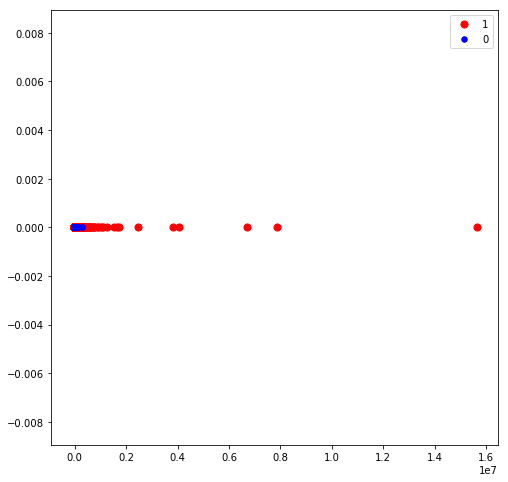

In [57]:
from sklearn.decomposition import PCA

n_components = 1
clf = PCA(n_components)
clf.fit(X)
print(clf.explained_variance_ratio_)
print('Percentage of variance explained by {} component(s): {}'.format(n_components, sum(clf.explained_variance_ratio_)))
X_proj = clf.transform(X)

# Plot projection of samples
X_pos = X_proj[(train['Y'] == 1)]
X_neg = X_proj[(train['Y'] == 0)]
fig = plt.figure(figsize=(8,8))
plt.scatter(X_pos, np.zeros(len(X_pos)), s=50, c='red', label='1')
plt.scatter(X_neg, np.zeros(len(X_neg)), s=30, c='blue', label='0')
plt.legend()
plt.show()

# Filter data through PCA if activated
if 1:
    X['PCA'] = X_proj
    test_proj = clf.fit_transform(test)
    test['PCA'] = test_proj

In [58]:
display(X.head())
display(test.head())

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F14,F15,F16,F18,F19,F20,F21,F23,PCA
id,,,,,,,,,,,,,,,,,,,,
1,38733,61385,0,38,118751,1000,32020,1,121980,127959,1,117983,1,119757,1,118830,1,1,1,649.420174
2,34248,51329,0,41,120800,1000,130630,1,124029,128342,2,121818,1,138110,1,118832,1,1,1,-4144.915022
3,15830,5522,0,50,118779,1000,303218,2,122006,128299,1,118585,1,119777,1,118832,1,2,1,-13655.970701
4,19417,6754,0,45,123163,2000,19024,1,126391,127968,1,6796,2,270637,1,118832,1,1,1,5116.264267
5,42122,16991,0,41,119193,1000,303218,1,122422,128299,1,125013,1,119777,1,118832,1,1,1,-13672.882854


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F14,F15,F16,F18,F19,F20,F21,F23,PCA
id,,,,,,,,,,,,,,,,,,,,
16384,27991,135396,0,33,120578,17000,143022,1,124156,140341,1,119218,1,128168,1,122084,1,1,1,-33541.183107
16385,82444,54655,0,38,120064,18000,315517,1,123643,138050,1,118963,1,121648,1,119703,1,2,1,-32519.700534
16386,37950,23477,1,27,120267,1000,142929,1,123845,137960,1,118551,1,314350,1,119703,1,1,1,-49558.231943
16387,75000,92055,0,33,118844,2000,130186,1,183832,128090,1,119495,1,140144,1,118961,1,1,1,-48546.528778
16388,84243,8156,0,40,136613,2000,132071,1,139841,128051,1,118449,1,121642,1,118832,1,1,1,-48547.032164


In [56]:
pca = pd.DataFrame(X_proj)
X['PCA'] = X_proj
print(X.shape)
display(X.head())
#display(pca)

(16383, 20)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F14,F15,F16,F18,F19,F20,F21,F23,PCA
id,,,,,,,,,,,,,,,,,,,,
1,38733,61385,0,38,118751,1000,32020,1,121980,127959,1,117983,1,119757,1,118830,1,1,1,459.209409
2,34248,51329,0,41,120800,1000,130630,1,124029,128342,2,121818,1,138110,1,118832,1,1,1,-2930.897520
3,15830,5522,0,50,118779,1000,303218,2,122006,128299,1,118585,1,119777,1,118832,1,2,1,-9656.229486
4,19417,6754,0,45,123163,2000,19024,1,126391,127968,1,6796,2,270637,1,118832,1,1,1,3617.745157
5,42122,16991,0,41,119193,1000,303218,1,122422,128299,1,125013,1,119777,1,118832,1,1,1,-9668.188185


### Linear Discriminant Analysis

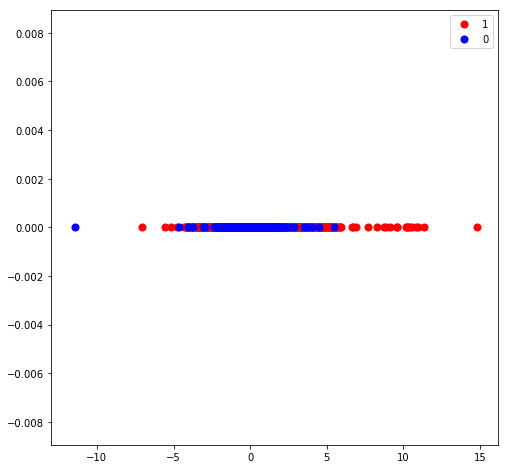

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X, y)
X_proj = clf.transform(X)

# Plot projection of samples
X_pos = X_proj[(train['Y'] == 1)]
X_neg = X_proj[(train['Y'] == 0)]
fig = plt.figure(figsize=(8,8))
plt.scatter(X_pos, np.zeros(len(X_pos)), s=50, c='red', label='1')
plt.scatter(X_neg, np.zeros(len(X_neg)), s=50, c='blue', label='0')
plt.legend()
plt.show()

Neither dimensionality reduction technique seems to help much. We could potentially add our 1 dimensional PCA as an additional feature however since it seems to group all of the 0s tightly.

## Now let's apply some models.

### Ridge Regression

In [29]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn import tree
from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [16]:
# Parameters
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.Ridge(), tuned_parameters, cv=n_folds, scoring='roc_auc')
clf.fit(X, y)
best_alpha = clf.best_params_['alpha']

# Apply model
y_train_pred = clf.predict(X)
y_pred = clf.predict(test)
mse = mean_squared_error(y, y_train_pred)

# Results
print('--- RIDGE REGRESSION ---')
print('best alpha for ridge:', best_alpha)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- RIDGE REGRESSION ---
best alpha for ridge: 216438.064054
MSE predicting on training data: 0.055037409287909095
AUC predicting on training data: 0.547652264634236
[ 0.93919672  0.94233209  0.94431947 ...,  0.93736173  0.95269906
  0.9544064 ]
[ 0.93054869  0.93527676  0.94005941 ...,  0.93753345  0.93839542
  0.9403393 ]


In [17]:
# Export ridge results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/ridge_submission.csv', columns = ['id','Y'], index=False)

### Lasso Regression

In [18]:
# Parameters
alphas =  10**np.linspace(10,-2,100)*0.5
tuned_parameters = [{'alpha': alphas}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.Lasso(), tuned_parameters, cv=n_folds, scoring='roc_auc')
clf.fit(X, y)
best_alpha = clf.best_params_['alpha']

# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- LASSO REGRESSION ---')
print('best alpha for lasso:', best_alpha)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- LASSO REGRESSION ---
best alpha for lasso: 0.005
MSE predicting on training data: 0.05503715484307998
AUC predicting on training data: 0.5474510019730096
[ 0.93911614  0.94236445  0.94471206 ...,  0.93717081  0.95272912
  0.95455275]
[ 0.93028527  0.93518324  0.93960584 ...,  0.93759215  0.93827691
  0.94037946]


In [19]:
# Export lasso results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/lasso_submission.csv', columns = ['id','Y'], index=False)

### Logistic Regression

In [20]:
# Parameters
C = [0.01, 0.1, 1, 10 ,100]
tuned_parameters = [{'C': C}]
n_folds = 10

# Setup model
clf = GridSearchCV(linear_model.LogisticRegression(), tuned_parameters, cv=n_folds, scoring='roc_auc')
clf.fit(X,y)
best_c = clf.best_params_['C']

# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- LASSO REGRESSION ---')
print('best C for logistic regression:', best_c)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- LASSO REGRESSION ---
best C for logistic regression: 0.01
MSE predicting on training data: 0.05853628761521089
AUC predicting on training data: 0.5
[1 1 1 ..., 1 1 1]
[1 1 1 ..., 1 1 1]


In [21]:
# Export logistic regression results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/logistic_submission.csv', columns = ['id','Y'], index=False)

### Binary Decision Tree

In [22]:
# Parameters
parameters = {'max_depth':range(3,20)}
n_folds = 10

# Setup model
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv=n_folds, scoring='roc_auc')
clf.fit(X, y)

# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- DECISION TREE ---')
print (clf.best_score_, clf.best_params_)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- DECISION TREE ---
0.641226155353 {'max_depth': 13}
MSE predicting on training data: 0.035768784715864005
AUC predicting on training data: 0.710609070706
[1 1 1 ..., 1 1 1]
[1 1 1 ..., 1 1 1]


In [23]:
# Export decision tree classifier results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/tree_submission.csv', columns = ['id','Y'], index=False)

### XGBoost

In [44]:
# Parameters
max_depth = [3, 6, 9]
min_child_weight = [0.1,0.5, 1, 2, 5]
gamma = [0, 1, 10]
subsample = [0.5, 1]
learning_rate = [0.01, 0.05, 0.2] 
n_estimators = [100, 200]
subsample = [0.5, 1]
colsample_bytree = [0.5, 1]

# Setup model
parameters = {'subsample':subsample, 'colsample_bytree':colsample_bytree, 'learning_rate':learning_rate, 'max_depth':max_depth, 'gamma':gamma, 'learning_rate':eta, 'min_child_weight':min_child_weight, 'subsample':subsample, 'n_estimators':n_estimators}
clf = GridSearchCV(XGBRegressor(), parameters, scoring='roc_auc')

# Train classifier with time
start_time = time.time()
clf.fit(X, y)
clf_fit_time = (time.time() - start_time)
print("XGBoost train time : {:.5f}".format(clf_fit_time))

XGBoost train time : 3776.68857


In [65]:
# Export decision tree classifier results to csv
df = pd.DataFrame({'id': test.index.values, 'Y': y_pred})
df.to_csv('submissions/xgb_submission.csv', columns = ['id','Y'], index=False)

In [64]:
# Using best parameters to create new XGBoost instance
a = XGBRegressor(colsample_bytree=0.5, gamma=0, learning_rate=0.01, max_depth=9, min_child_weight=5, n_estimators=200, subsample=1)

# Train classifier with time
start_time = time.time()
a.fit(X, y)
clf_fit_time = (time.time() - start_time)
print("XGBoost train time : {:.5f}".format(clf_fit_time))

# Apply model
y_train_pred = a.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = a.predict(test)

# Results
print('--- XGBOOST ---')
#print (a.best_score_, a.best_params_)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

XGBoost train time : 2.97023
--- XGBOOST ---
MSE predicting on training data: 0.04426331349015989
AUC predicting on training data: 0.9725556693737859
[ 0.85871542  0.89803511  0.90780473 ...,  0.88152182  0.90493548
  0.89366031]
[ 0.85460305  0.78004265  0.82558608 ...,  0.79946208  0.86511147
  0.89433694]


In [45]:
# Apply model
y_train_pred = clf.predict(X)
mse = mean_squared_error(y, y_train_pred)
y_pred = clf.predict(test)

# Results
print('--- XGBOOST ---')
print (clf.best_score_, clf.best_params_)
print('MSE predicting on training data: {}'.format(mse))
print('AUC predicting on training data: {}'.format(roc_auc_score(y, y_train_pred)))
print(y_train_pred)
print(y_pred)

--- XGBOOST ---
0.748528831815 {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 1}
MSE predicting on training data: 0.04466547701460111
AUC predicting on training data: 0.9669084162271384
[ 0.85811663  0.90153027  0.90826511 ...,  0.87643874  0.90855396
  0.90299082]
[ 0.88762248  0.78539538  0.84639323 ...,  0.83115828  0.90788221
  0.89508492]
